## How `n_min_threshold` changes what features are detected

#### Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tobac
import xarray as xr

#### Generate Feature Data

Here, we will generate some simple feature data with a variety of features, large and small. 

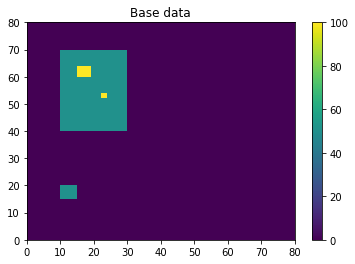

In [2]:
# Dimensions here are time, y, x.
input_field_arr = np.zeros((1,80,80))
# small 5x5 feature, area of 25 points
input_field_arr[0, 15:20, 10:15]=50
# larger 30x30 feature, area of 900
input_field_arr[0, 40:70, 10:30]=50
# small 2x2 feature within larger 30x30 feature, area of 4 points
input_field_arr[0, 52:54, 22:24]=100
# small 4x4 feature within larger 30x30 feature, area of 16 points
input_field_arr[0, 60:64, 15:19]=100

plt.pcolormesh(input_field_arr[0])
plt.colorbar()
plt.title("Base data")
plt.show()

In [3]:
# We now need to generate an Iris DataCube out of this dataset to run tobac feature detection. 
# One can use xarray to generate a DataArray and then convert it to Iris, as done here. 
input_field_iris = xr.DataArray(input_field_arr, dims=['time', 'Y', 'X'], coords={'time': [np.datetime64('2019-01-01T00:00:00')]}).to_iris()
# Version 2.0 of tobac (currently in development) will allow the use of xarray directly with tobac. 

#### No `n_min_threshold`
If we keep `n_min_threshold` at the default value of `0`, all three features will be detected with the appropriate thresholds used.

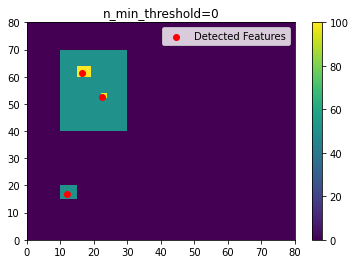

In [4]:
thresholds = [50, 100]
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature.
# All filtering is off in this example, although that is not usually recommended.
single_threshold_features = tobac.feature_detection_multithreshold(field_in = input_field_iris, dxy = 1000, threshold=thresholds, target='maximum', position_threshold='center', sigma_threshold=0)
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(x=single_threshold_features['hdim_2'].values, y=single_threshold_features['hdim_1'].values, color='r', label="Detected Features")
plt.legend()
plt.title("n_min_threshold=0")
plt.show()

#### Increasing `n_min_threshold`
As we increase `n_min_threshold`, fewer of these separate features are detected. In this example, if we set `n_min_threshold` to 5, the smallest detected feature goes away. 

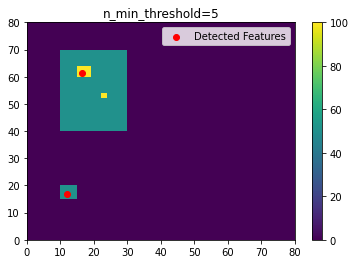

In [5]:
thresholds = [50, 100]
n_min_threshold = 5
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature.
# All filtering is off in this example, although that is not usually recommended.
single_threshold_features = tobac.feature_detection_multithreshold(field_in = input_field_iris, dxy = 1000, threshold=thresholds, target='maximum', position_threshold='center', sigma_threshold=0,
    n_min_threshold=n_min_threshold)
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(x=single_threshold_features['hdim_2'].values, y=single_threshold_features['hdim_1'].values, color='r', label="Detected Features")
plt.legend()
plt.title("n_min_threshold={0}".format(n_min_threshold))
plt.show()

If we increase `n_min_threshold` to 20, only the large 50-valued feature is detected, rather than the two higher-valued squares.

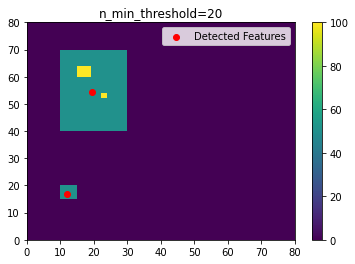

In [6]:
thresholds = [50, 100]
n_min_threshold = 20
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature.
# All filtering is off in this example, although that is not usually recommended.
single_threshold_features = tobac.feature_detection_multithreshold(field_in = input_field_iris, dxy = 1000, threshold=thresholds, target='maximum', position_threshold='center', sigma_threshold=0,
    n_min_threshold=n_min_threshold)
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(x=single_threshold_features['hdim_2'].values, y=single_threshold_features['hdim_1'].values, color='r', label="Detected Features")
plt.legend()
plt.title("n_min_threshold={0}".format(n_min_threshold))
plt.show()

If we set `n_min_threshold` to 100, only the largest feature is detected.

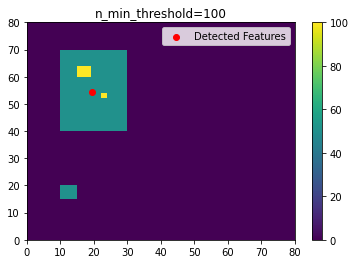

In [7]:
thresholds = [50, 100]
n_min_threshold = 100
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature.
# All filtering is off in this example, although that is not usually recommended.
single_threshold_features = tobac.feature_detection_multithreshold(field_in = input_field_iris, dxy = 1000, threshold=thresholds, target='maximum', position_threshold='center', sigma_threshold=0,
    n_min_threshold=n_min_threshold)
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(x=single_threshold_features['hdim_2'].values, y=single_threshold_features['hdim_1'].values, color='r', label="Detected Features")
plt.legend()
plt.title("n_min_threshold={0}".format(n_min_threshold))
plt.show()